**¡Hola Javier!** 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso.:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**

---

<div class="alert alert-block alert-warning">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Javier has realizado un análisis exploratorio de datos (EDA) muy cuidadoso, preparando meticulosamente la información para garantizar un estudio riguroso. En el aspecto de visualización, has empleado herramientas que permiten comprender el comportamiento de consumo de los usuarios en diferentes planes, mostrando habilidad para representar datos complejos. Respecto a las pruebas de hipótesis, has mostrado un dominio técnico significativo, haciendo una comparativa correcta entre subconjuntos de datos. Identifico que necesitas realizar algunos ajustes en el cálculo del consumo de internet para determinar con mayor precisión el cobro mensual por usuario, lo cual es fundamental para la validez de tus conclusiones. Estoy seguro que podrás hacer estos ajustes de fácilmente. Estaré atento a tu próxima iteración 👀.


</div>

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

¡Javier excelente trabajo con los ajustes! Tu proyecto ahora cumple con todos los objetivos propuestos. Estoy seguro de que lo que aprendiste aquí te será muy útil en futuros proyectos. ¡Éxito en tu próximo sprint! 🚀
    
*Estado del Proyecto:* **Aprobado**

</div>

---

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización
Se evaluara los ingresos de cada tarifa que ofrece la empresa Megaline con el objetivo de realizar el presupuesto de publicidad de manera correcta tomando la desición correcta donde invertiremos mayor capital para la generación de mayores utilidades.

In [227]:
# Cargar todas las librerías
import pandas as pd
from math import factorial
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, binom, poisson, uniform


## Cargar datos

In [228]:
# Carga los archivos de datos en diferentes DataFrames

users = pd.read_csv('G:\\.shortcut-targets-by-id\\1ec4irvsZdM58w7ZpjkoK9daldWphQX4A\\Proyectos\\datasets\\megaline_users.csv')
calls = pd.read_csv('G:\\.shortcut-targets-by-id\\1ec4irvsZdM58w7ZpjkoK9daldWphQX4A\\Proyectos\\datasets\\megaline_calls.csv')
internet = pd.read_csv('G:\\.shortcut-targets-by-id\\1ec4irvsZdM58w7ZpjkoK9daldWphQX4A\\Proyectos\\datasets\\megaline_internet.csv')
messages = pd.read_csv('G:\\.shortcut-targets-by-id\\1ec4irvsZdM58w7ZpjkoK9daldWphQX4A\\Proyectos\\datasets\\megaline_messages.csv')
plans = pd.read_csv('G:\\.shortcut-targets-by-id\\1ec4irvsZdM58w7ZpjkoK9daldWphQX4A\\Proyectos\\datasets\\megaline_plans.csv')
#calls=pd.read_csv('/datasets/megaline_calls.csv') 
#internet=pd.read_csv('/datasets/megaline_internet.csv')
#messages=pd.read_csv('/datasets/megaline_messages.csv') 
#plans=pd.read_csv('/datasets/megaline_plans.csv') 
#users=pd.read_csv('/datasets/megaline_users.csv') # Carga los archivos de datos en diferentes DataFrames


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [229]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [230]:
# Imprime una muestra de los datos para las tarifas
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

## Corregir datos

Se renombran las columnas para poder acceder a la información general de manera mas agil.

In [231]:
plans = plans.rename(columns={'messages_included':'mensajes_incluidos',
                     'mb_per_month_included':'mb_incluidos',
                     'minutes_included':'minutos_incluidos',
                     'usd_monthly_pay':'pago_mensual',
                     'usd_per_gb':'precio_gb_extra',
                     'usd_per_message':'precio_sms_extra',
                     'usd_per_minute':'precio_min_extra',
                     'plan_name':'plan' })

plans.head()

,mensajes_incluidos,mb_incluidos,minutos_incluidos,pago_mensual,precio_gb_extra,precio_sms_extra,precio_min_extra,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Enriquecer los datos

Se agrega la columna de GB incluidos para un mejor manejo de la información truncando la información de los MG incluidos

In [232]:
plans['gb_incluidos'] = plans['mb_incluidos'] //1000
plans.head()

,mensajes_incluidos,mb_incluidos,minutos_incluidos,pago_mensual,precio_gb_extra,precio_sms_extra,precio_min_extra,plan,gb_incluidos
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


## Usuarios/as

In [233]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [234]:
# Imprime una muestra de datos para usuarios
users.sample(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
375,1375,Andy,Holden,69,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-01,surf,NaN
329,1329,Doyle,Nunez,65,"Charleston-North Charleston, SC MSA",2018-08-25,ultimate,NaN
61,1061,Maryam,Valencia,38,"Columbia, SC MSA",2018-03-08,ultimate,NaN
308,1308,Samara,Monroe,46,"Virginia Beach-Norfolk-Newport News, VA-NC MSA",2018-11-22,surf,NaN
124,1124,Jenell,Navarro,48,"New Haven-Milford, CT MSA",2018-02-19,ultimate,NaN
212,1212,Alfredo,Pruitt,36,"Austin-Round Rock-Georgetown, TX MSA",2018-07-27,surf,NaN
411,1411,Man,Fleming,64,"Rochester, NY MSA",2018-08-10,surf,NaN
429,1429,Arianna,Rowe,36,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-22,surf,NaN
327,1327,Natosha,Peck,20,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-17,surf,NaN
19,1019,Shizue,Landry,34,"Jacksonville, FL MSA",2018-01-16,surf,NaN


Se observa que las fechas no tienen el formato correcto y existen valores ausentes en la columna churn_date

### Corregir los datos

Convertimos a datatime las columnas de fechas y llenamos valores auscentes con el supuesto que se extrajo la información el 31 de Diciembre

In [235]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

users.fillna({'churn_date':'2018-12-31'}, inplace=True) # Sustituimos valores ausentes por el último día del año

users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31


### Enriquecer los datos

Agregamos el mes de suscripcion de cada usuario para analizarlo de manera mas ágil

In [236]:
users['mes']= users['reg_date'].dt.month
users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,mes
342,1342,Eugene,Patton,65,"Indianapolis-Carmel-Anderson, IN MSA",2018-10-21,surf,2018-12-31,10
239,1239,Quentin,Hancock,24,"Fresno, CA MSA",2018-08-11,surf,2018-12-31,8
97,1097,Deandre,Powell,27,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-02-26,surf,2018-12-31,2
309,1309,Winfred,Zimmerman,19,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-07-04,surf,2018-12-31,7
485,1485,Damion,Woodard,67,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-08-21,surf,2018-12-31,8
213,1213,Carl,Newman,47,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-11-25,ultimate,2018-12-31,11
147,1147,Duncan,Malone,71,"Urban Honolulu, HI MSA",2018-04-30,surf,2018-12-31,4
334,1334,Donovan,Horton,34,"Seattle-Tacoma-Bellevue, WA MSA",2018-03-08,surf,2018-12-31,3
263,1263,Lucio,Duffy,39,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-06,surf,2018-12-31,3
399,1399,Leonila,Baird,24,"San Antonio-New Braunfels, TX MSA",2018-06-06,surf,2018-12-31,6


## Llamadas

In [237]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [238]:
# Imprime una muestra de datos para las llamadas
calls.head(10)


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


Se observa la fecha con un formato erroneo donde podriamos segregar el mes y redondear la duración de minutos ya que el ejercicio menciona que 1 segundo se contara como 1 minuto.

### Corregir los datos

Se corrige el formato de la fecha

In [239]:
calls['call_date']=pd.to_datetime(calls['call_date'])

### Enriquecer los datos

Se agrega el mes que se realiza la llamada y una columna redondeando los minutos

In [240]:
calls['mes']= calls['call_date'].dt.month
calls['duration_min'] = calls['duration'].apply(lambda x:np.ceil(x) if x % 1 != 0 else x)

calls.head(15)

,id,user_id,call_date,duration,mes,duration_min
0,1000_93,1000,2018-12-27,8.52,12,9.0
1,1000_145,1000,2018-12-27,13.66,12,14.0
2,1000_247,1000,2018-12-27,14.48,12,15.0
3,1000_309,1000,2018-12-28,5.76,12,6.0
4,1000_380,1000,2018-12-30,4.22,12,5.0
5,1000_388,1000,2018-12-31,2.20,12,3.0
6,1000_510,1000,2018-12-27,5.75,12,6.0
7,1000_521,1000,2018-12-28,14.18,12,15.0
8,1000_530,1000,2018-12-28,5.77,12,6.0
9,1000_544,1000,2018-12-26,4.40,12,5.0


## Mensajes

In [241]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [242]:
# Imprime una muestra de datos para los mensajes
messages.sample(10)


,id,user_id,message_date
59666,1379_143,1379,2018-12-04
16248,1110_139,1110,2018-08-13
26333,1159_336,1159,2018-12-09
51310,1334_28,1334,2018-09-19
43195,1285_6,1285,2018-08-17
74809,1484_442,1484,2018-12-29
54192,1343_280,1343,2018-11-05
33544,1211_220,1211,2018-12-22
71183,1465_60,1465,2018-07-21
19069,1123_138,1123,2018-08-14


Cambiamos formato de fecha y agregamos el mes que se dieron los mensajes

### Corregir los datos

Corregimos formato de fecha

In [243]:
messages['message_date']=pd.to_datetime(messages['message_date'])

### Enriquecer los datos

Agregamos el mes que se realizo el mensaje

In [244]:
messages['mes']= messages['message_date'].dt.month
messages.sample(15)

,id,user_id,message_date,mes
13809,1094_42,1094,2018-11-09,11
63140,1401_67,1401,2018-10-09,10
59632,1379_109,1379,2018-12-26,12
4776,1044_154,1044,2018-10-24,10
66478,1433_418,1433,2018-10-08,10
16009,1105_208,1105,2018-11-07,11
11837,1079_236,1079,2018-08-27,8
21470,1132_826,1132,2018-06-09,6
70483,1458_184,1458,2018-09-28,9
44462,1295_149,1295,2018-08-30,8


## Internet

In [245]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [246]:
# Imprime una muestra de datos para el tráfico de internet
internet.sample(10)



,id,user_id,session_date,mb_used
36874,1166_40,1166,2018-12-02,468.78
10478,1054_10,1054,2018-08-28,362.99
922,1005_36,1005,2018-12-22,614.32
35170,1159_7,1159,2018-10-25,124.02
87280,1404_147,1404,2018-10-14,460.39
15335,1069_247,1069,2018-10-13,578.26
58185,1262_37,1262,2018-12-22,768.05
74580,1351_66,1351,2018-12-29,399.87
55570,1251_381,1251,2018-10-25,76.69
97802,1460_496,1460,2018-08-12,733.50


El formato de fecha es incorrecto, adicional debemos convertir MG a GB redondeando la cifra y agregando el mes de consumo.

### Corregir los datos

Se corrige formsto de fecha

In [247]:
internet['session_date']=pd.to_datetime(internet['session_date'])

### Enriquecer los datos

Se agrega el mes de consumo y los GB consumidos

In [248]:
internet['mes'] = internet['session_date'].dt.month
#internet['gb_used']= (internet['mb_used'] / 1000).apply(lambda x:np.ceil(x if x % 1 !=0 else x))
internet.sample(10)

,id,user_id,session_date,mb_used,mes
11197,1055_202,1055,2018-09-08,345.90,9
19266,1086_55,1086,2018-12-25,0.00,12
85158,1397_496,1397,2018-10-29,496.81,10
19335,1087_62,1087,2018-12-26,295.75,12
9661,1050_80,1050,2018-11-03,162.54,11
99467,1468_287,1468,2018-12-23,409.20,12
102934,1493_52,1493,2018-11-24,0.00,11
89045,1410_192,1410,2018-12-21,265.20,12
42002,1187_179,1187,2018-11-04,101.76,11
87779,1406_96,1406,2018-08-17,424.64,8


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Javier excelente trabajo en el análisis exploratorio de datos, comprobaste los datos duplicados y faltantes proceso que es clave para evitar errores en el estudio de los datos. Además hiciste los ajustes necesarios el los tipo de datos, esto facilitará el desarrollo de las demás etapas del proyecto
    

    

</div>

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [249]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans.head()



,mensajes_incluidos,mb_incluidos,minutos_incluidos,pago_mensual,precio_gb_extra,precio_sms_extra,precio_min_extra,plan,gb_incluidos
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [250]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls.head()
llamadas = calls.groupby(['user_id','mes'])['user_id'].count().reset_index(name='numero_llamadas')
llamadas


,user_id,mes,numero_llamadas
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [251]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
calls.head()
minutos= calls.groupby(['user_id','mes'])['duration_min'].sum().reset_index(name = 'min_usados')
minutos


,user_id,mes,min_usados
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
...,...,...,...
2253,1498,12,339.0
2254,1499,9,346.0
2255,1499,10,385.0
2256,1499,11,308.0


In [252]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages.head()
mensajes = messages.groupby(['user_id','mes'])['id'].count().reset_index(name= 'numero_mensajes')
mensajes

,user_id,mes,numero_mensajes
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [253]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet.head()
internet_total = internet.groupby(['user_id','mes'])['mb_used'].sum().reset_index(name='total_mb') # Se suman los MB
internet_total['internet_usado'] = (internet_total['total_mb'] / 1000).apply(lambda x:np.ceil(x if x % 1 !=0 else x)) # Posterior se convierte a GB y nos da la informacion correcta
internet_total



,user_id,mes,total_mb,internet_usado
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,23.0
4,1001,11,18504.30,19.0
...,...,...,...,...
2272,1498,12,23137.69,24.0
2273,1499,9,12984.76,13.0
2274,1499,10,19492.43,20.0
2275,1499,11,16813.83,17.0


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Hiciste una agrupción correcta de los datos usando `groupby`. Solo hay un error en el cálculo de consumo de internet. Los pasos que realizaste son correctos pero el orden no lo es, por esa razón los valores que obtienes más adelante no son los esperados. Lo que debes hacer es lo siguiente:
    
1. Primero sumas el consumo total en MB por usuario para cada mes
2. Luego Ahí si conviertes los valores a GB
3. Finalmente haces el redondeo hacia arriba.
    
Dado que el cobro es mensual, no es correcto hacer el redondeo para el consumo diario. Esto hace que estés obteniendo consumos de internet muy altos, lo que se verá reflejado en un cobro incorrecto.

</div>    

<div class="alert alert-block alert-info">
<b>Se realizaron los cambios dando los GB correctos</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabjo Javier!

</div>

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [254]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
consumo_usuario = pd.merge(llamadas,minutos, on=['user_id','mes'], how='outer')
consumo_usuario = pd.merge(consumo_usuario,mensajes, on=['user_id','mes'], how='outer')
consumo_usuario = pd.merge(consumo_usuario,internet_total[['user_id','mes','internet_usado']], on=['user_id','mes'], how='outer')
consumo_usuario


,user_id,mes,numero_llamadas,min_usados,numero_mensajes,internet_usado
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,27.0,182.0,30.0,7.0
2,1001,9,49.0,315.0,44.0,14.0
3,1001,10,65.0,393.0,53.0,23.0
4,1001,11,64.0,426.0,36.0,19.0
...,...,...,...,...,...,...
2288,1498,12,39.0,339.0,NaN,24.0
2289,1499,9,41.0,346.0,NaN,13.0
2290,1499,10,53.0,385.0,NaN,20.0
2291,1499,11,45.0,308.0,NaN,17.0


In [255]:
# Añade la información de la tarifa
consumo_usuario = pd.merge(consumo_usuario,users[['user_id','plan']], on='user_id',how='left')
consumo_usuario = pd.merge(consumo_usuario,plans[['plan','pago_mensual','precio_gb_extra','precio_sms_extra','precio_min_extra','mensajes_incluidos','minutos_incluidos','gb_incluidos']], on='plan', how='left')
consumo_usuario.head()

,user_id,mes,numero_llamadas,min_usados,numero_mensajes,internet_usado,plan,pago_mensual,precio_gb_extra,precio_sms_extra,precio_min_extra,mensajes_incluidos,minutos_incluidos,gb_incluidos
0,1000,12,16.0,124.0,11.0,2.0,ultimate,70,7,0.01,0.01,1000,3000,30
1,1001,8,27.0,182.0,30.0,7.0,surf,20,10,0.03,0.03,50,500,15
2,1001,9,49.0,315.0,44.0,14.0,surf,20,10,0.03,0.03,50,500,15
3,1001,10,65.0,393.0,53.0,23.0,surf,20,10,0.03,0.03,50,500,15
4,1001,11,64.0,426.0,36.0,19.0,surf,20,10,0.03,0.03,50,500,15


In [256]:
consumo_usuario.fillna(0, inplace= True) # Se ponen en 0 los valores ausentes ya que posiblemente no se enviaron mensajes, consumieron gb o tampoco se realizaron llamadas

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [257]:
# Calcula el ingreso mensual para cada usuario
#Calculamos extra en minutos
consumo_usuario['min_extra'] = consumo_usuario['minutos_incluidos'] - consumo_usuario['min_usados']
consumo_usuario['min_extra'] = consumo_usuario['min_extra'].apply(lambda x: abs(x) if x < 0 else 0)
consumo_usuario['costo_extra_min'] = consumo_usuario['min_extra']*consumo_usuario['precio_min_extra']
#Calculamos extra en gb
consumo_usuario['gb_extra'] = consumo_usuario['gb_incluidos'] - consumo_usuario['internet_usado']
consumo_usuario['gb_extra'] = consumo_usuario['gb_extra'].apply(lambda x: abs(x) if x < 0 else 0)
consumo_usuario['costo_extra_gb'] = consumo_usuario['gb_extra']*consumo_usuario['precio_gb_extra']
#Calculamos extra en sms
consumo_usuario['sms_extra'] = consumo_usuario['mensajes_incluidos'] - consumo_usuario['numero_mensajes']
consumo_usuario['sms_extra'] = consumo_usuario['sms_extra'].apply(lambda x: abs(x) if x < 0 else 0)
consumo_usuario['costo_extra_sms'] = consumo_usuario['sms_extra']*consumo_usuario['precio_sms_extra']
consumo_usuario.sample(15)

#Calculamos ingresos totales con extras
consumo_usuario['ingresos'] = consumo_usuario['pago_mensual'] + consumo_usuario['costo_extra_min'] + consumo_usuario['costo_extra_gb'] + consumo_usuario['costo_extra_sms']
consumo_usuario.sample(6)


,user_id,mes,numero_llamadas,min_usados,numero_mensajes,internet_usado,plan,pago_mensual,precio_gb_extra,precio_sms_extra,...,mensajes_incluidos,minutos_incluidos,gb_incluidos,min_extra,costo_extra_min,gb_extra,costo_extra_gb,sms_extra,costo_extra_sms,ingresos
349,1074,11,11.0,105.0,0.0,1.0,ultimate,70,7,0.01,...,1000,3000,30,0.0,0.00,0.0,0.0,0.0,0.00,70.00
1931,1412,6,61.0,399.0,19.0,8.0,ultimate,70,7,0.01,...,1000,3000,30,0.0,0.00,0.0,0.0,0.0,0.00,70.00
339,1072,12,71.0,420.0,18.0,35.0,surf,20,10,0.03,...,50,500,15,0.0,0.00,20.0,200.0,0.0,0.00,220.00
2139,1465,12,108.0,757.0,28.0,16.0,ultimate,70,7,0.01,...,1000,3000,30,0.0,0.00,0.0,0.0,0.0,0.00,70.00
482,1101,8,54.0,456.0,106.0,16.0,surf,20,10,0.03,...,50,500,15,0.0,0.00,1.0,10.0,56.0,1.68,31.68
1539,1334,10,121.0,808.0,17.0,23.0,surf,20,10,0.03,...,50,500,15,308.0,9.24,8.0,80.0,0.0,0.00,109.24


In [258]:
columnas = ['pago_mensual','costo_extra_min','costo_extra_gb','costo_extra_sms','ingresos']

resumen = consumo_usuario.groupby(['plan'])[columnas].sum()
resumen

,pago_mensual,costo_extra_min,costo_extra_gb,costo_extra_sms,ingresos
plan,,,,,
surf,31460,2900.25,65370.0,330.93,100061.18
ultimate,50400,0.00,1946.0,0.00,52346.00


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

La lógica de cálculo del cobro mensual, en general es correcta solo debes hacer los ajustes de redonde que te mencioné más arriba. Ten muy en cuenta el plan que tiene cada usuario, cuánto vale el plan base y los cobros por los consumos extras. 

</div>

<div class="alert alert-block alert-info">
<b>Se ajustan los ingresos con los ajustes anteriores y se ven cifras correctas</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Has calculador correctamente el cobro mensual.

</div>

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

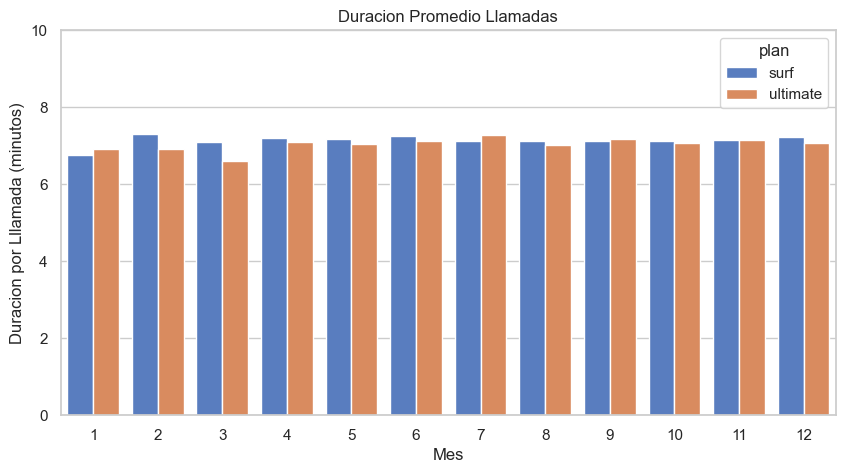

In [259]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
filtro_llamada= consumo_usuario.groupby(['plan','mes']).agg(
    sum_llamadas = ('numero_llamadas','sum'),
    sum_min = ('min_usados','sum'),
).reset_index()
filtro_llamada['duracion_prom'] = filtro_llamada['sum_min'] / filtro_llamada ['sum_llamadas']


sns.set(style='whitegrid')
plt.figure(figsize=(10, 5))
sns.barplot(data=filtro_llamada,
            y='duracion_prom',
            x='mes',
            hue='plan',
            palette="muted", 

            )
plt.ylim(0,10)
plt.title("Duracion Promedio Llamadas")
plt.xlabel("Mes")
plt.ylabel("Duracion por Lllamada (minutos)")
plt.show()

In [260]:
filtro_llamada

,plan,mes,sum_llamadas,sum_min,duracion_prom
0,surf,1,60.0,406.0,6.766667
1,surf,2,366.0,2673.0,7.303279
2,surf,3,1068.0,7590.0,7.106742
3,surf,4,2444.0,17577.0,7.191899
4,surf,5,4289.0,30768.0,7.173700
5,surf,6,5769.0,41836.0,7.251863
6,surf,7,7642.0,54448.0,7.124836
7,surf,8,9325.0,66438.0,7.124718
8,surf,9,11273.0,80360.0,7.128537
9,surf,10,14303.0,101846.0,7.120604


<function matplotlib.pyplot.show(close=None, block=None)>

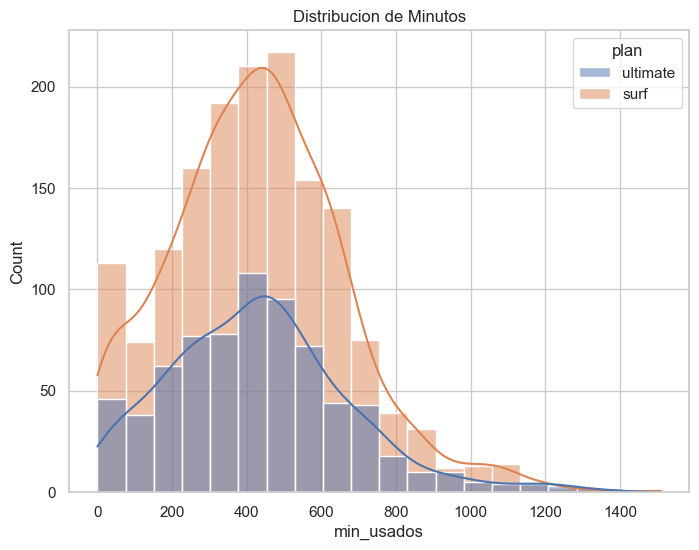

In [261]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
plt.figure(figsize=(8,6))
sns.histplot(data=consumo_usuario,x='min_usados', hue='plan',bins=20,kde=True)
plt.title('Distribucion de Minutos')
plt.show


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [262]:
# Calcula la media y la varianza de la duración mensual de llamadas.
media_varianza = consumo_usuario.groupby('plan')['min_usados'].agg(['mean','var'])
media_varianza


,mean,var
plan,,
surf,428.749523,54968.279461
ultimate,430.450000,57844.464812


C:\Users\AAFJ066661\AppData\Local\Temp\ipykernel_15320\2964319977.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=consumo_usuario, x='plan', y='min_usados', palette='Set2')


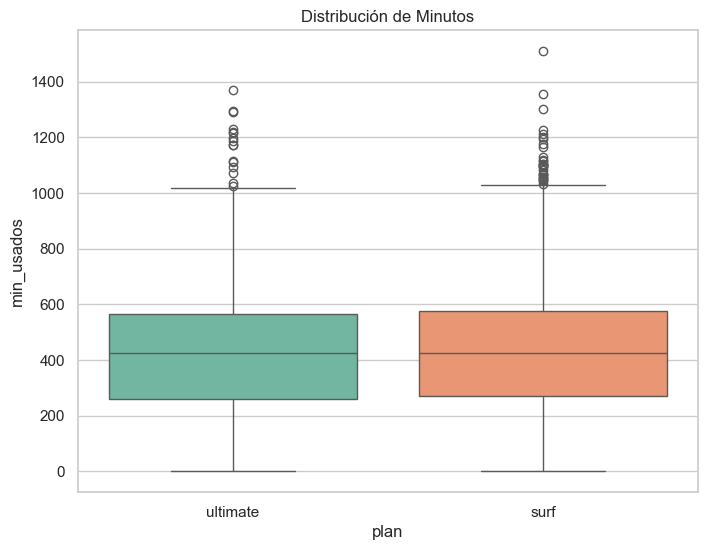

In [263]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(8, 6))
sns.boxplot(data=consumo_usuario, x='plan', y='min_usados', palette='Set2')
plt.title('Distribución de Minutos')
plt.show()

¿Su comportamiento varía en función del plan?

La media de los 2 planes es muy similar , así como el 1er y 3er cuartil por lo que podemos concluir que tienen el mismo comportamiento los 2 planes sin embargo existen más usuarios en el plan surf como se muestra en el histograma, así como mayor número de outliers.



### Mensajes

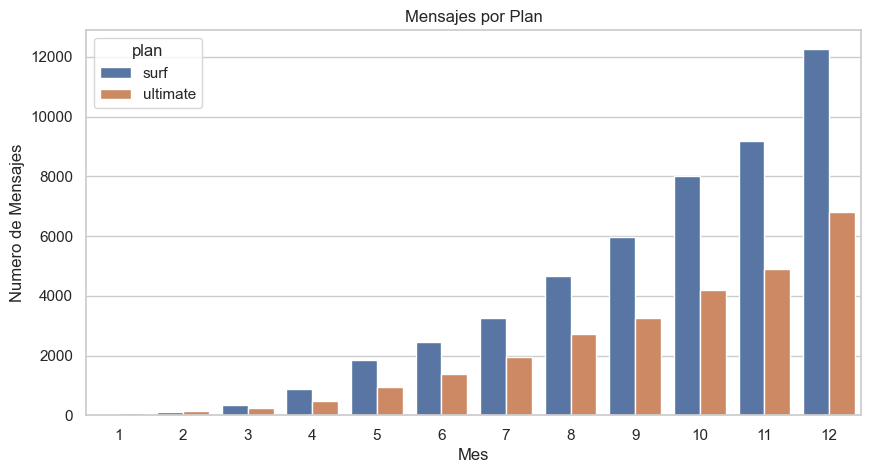

In [264]:
filtro_sms= consumo_usuario.groupby(['plan','mes'])['numero_mensajes'].sum().reset_index(name='mensajes_mensuales')

sns.set(style='whitegrid')
plt.figure(figsize=(10, 5))
sns.barplot(data=filtro_sms,
            y='mensajes_mensuales',
            x='mes',
            hue='plan',
            palette="deep", 

            )

plt.title("Mensajes por Plan")
plt.xlabel("Mes")
plt.ylabel("Numero de Mensajes")
plt.show()

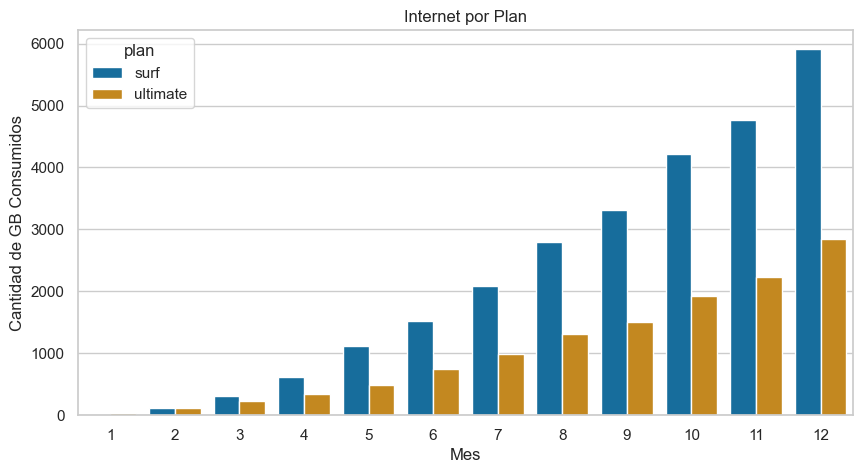

In [265]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
filtro_internet= consumo_usuario.groupby(['plan','mes'])['internet_usado'].sum().reset_index(name='internet_mensual')

sns.set(style='whitegrid')
plt.figure(figsize=(10, 5))
sns.barplot(data=filtro_internet,
            y='internet_mensual',
            x='mes',
            hue='plan',
            palette="colorblind", 

            )

plt.title("Internet por Plan")
plt.xlabel("Mes")
plt.ylabel("Cantidad de GB Consumidos")
plt.show()


¿Su comportamiento varía en función del plan?

Los planes se comportan de manera similar en los meses del año en el envio de mensajes y consumo de internet teniendo los mayores picos al final del año concluyendo que posiblemente las personas contrataron un paquete en el 2do semestre del año.

### Internet

<function matplotlib.pyplot.show(close=None, block=None)>

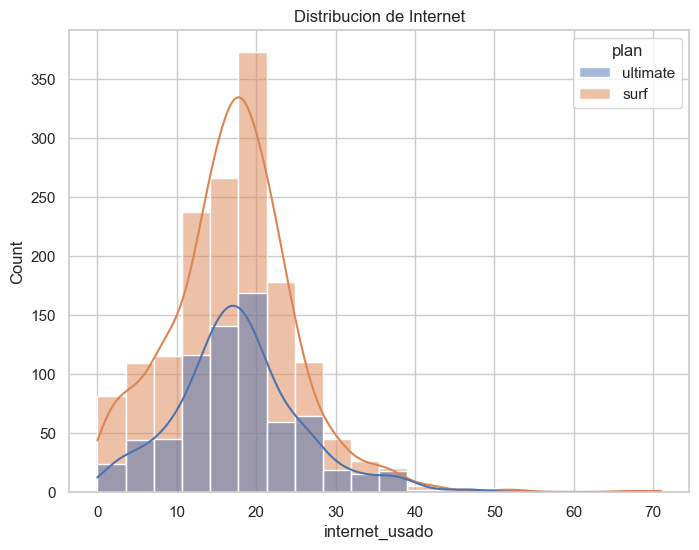

In [266]:
plt.figure(figsize=(8,6))
sns.histplot(data=consumo_usuario,x='internet_usado', hue='plan',bins=20,kde=True)
plt.title('Distribucion de Internet')
plt.show


In [267]:
media_varianza_internet = consumo_usuario.groupby('plan')['internet_usado'].agg(['mean','var'])
media_varianza_internet

,mean,var
plan,,
surf,17.037508,64.262587
ultimate,17.719444,61.862765


¿Su comportamiento varía en función del plan?

Se observa un comportamiento similar en los 2 planes sin embargo en el gráfico se observa que mas usuarios contratan el plan surf por ser mas económico.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [268]:
filtro_ingreso= consumo_usuario.groupby(['plan','mes'])['ingresos'].sum().reset_index(name='ingreso')
tabla_ingreso=pd.pivot_table(filtro_ingreso,values='ingreso',index='plan',columns='mes')
tabla_ingreso
filtro_ingreso


,plan,mes,ingreso
0,surf,1,40.00
1,surf,2,339.57
2,surf,3,1106.65
3,surf,4,2105.53
4,surf,5,3857.37
5,surf,6,4979.80
6,surf,7,8013.56
7,surf,8,10876.85
8,surf,9,11854.67
9,surf,10,16154.83


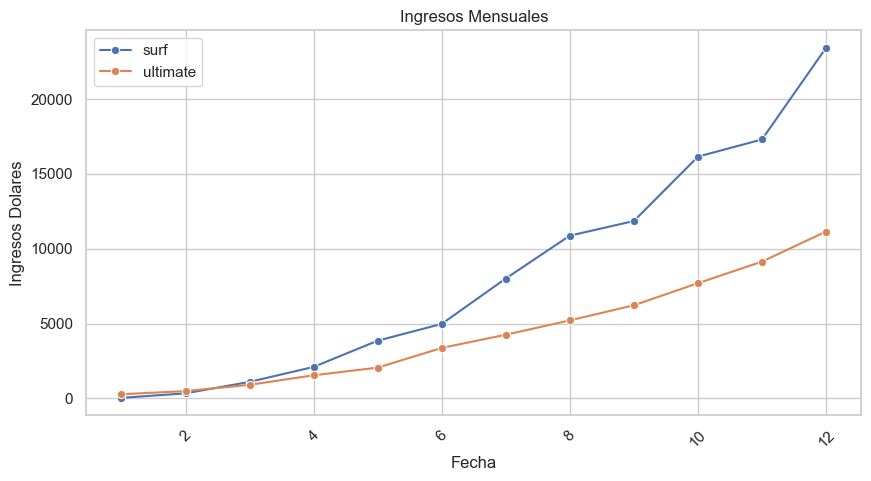

In [269]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=filtro_ingreso, x="mes", y="ingreso", marker="o", hue='plan')
plt.title("Ingresos Mensuales")
plt.xlabel("Fecha")
plt.ylabel("Ingresos Dolares")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [270]:
media_varianza_ingresos = consumo_usuario.groupby('plan')['ingresos'].agg(['mean','var','std'])
media_varianza_ingresos

,mean,var,std
plan,,,
surf,63.611685,3295.597694,57.407297
ultimate,72.702778,160.606946,12.673080


Se observa la misma temporalidad en cada plan de ingresos sin embargo existe una brecha incremental conforme pasa el año siendo una variación mayor en el último trimestre del año.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente selección de los tipos de gráficos para mostrar los datos. Adicionalmente, calculaste la información estadística de los datos. Esto te permitió realizar análisis detallados y claros sobre la información de consumo de los usuarios.
    
<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

   
Con respecto a la información de **Ingresos**  debes tener en cuenta que los valores cambiaran con base en los cambios en el cálculo de cobro mensual que te sugería más arriba.

</div>


</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [271]:
# Prueba las hipótesis
from scipy import stats as st

ingresos_ultimate = consumo_usuario[consumo_usuario['plan'] == 'ultimate']
ingresos_surf = consumo_usuario[consumo_usuario['plan'] == 'surf']

alpha = 0.05

resultados = st.ttest_ind(ingresos_ultimate['ingresos'], ingresos_surf['ingresos'], equal_var=False)

# Imprimir el valor p
print('Valor p:', resultados.pvalue)

# Comparar el valor p con el umbral
if resultados.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Valor p: 2.81373182813939e-09
Rechazamos la hipótesis nula


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [272]:
consumo_usuario = pd.merge(consumo_usuario,users[['user_id','city']], on='user_id', how='outer') # Agreagmos la ciudad

In [273]:
ingresos_NY_NJ = consumo_usuario[consumo_usuario['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA'] # Filtramos ingresos de NY-NC
ingresos_NY_NJ_sin_na = ingresos_NY_NJ.dropna() # Eliminamos ausentes para tomar una muestra
ingresos_restantes = consumo_usuario[consumo_usuario['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA'] # Filtramos ingresos diferentes a NY-NC
ingresos_restantes_sin_na = ingresos_restantes.dropna() # Eliminamos ausentes para tomar una muestra

# Prueba de las hipotesis
alpha = 0.05

resultado = st.ttest_ind(ingresos_NY_NJ_sin_na['ingresos'], ingresos_restantes_sin_na['ingresos'], equal_var=False)

# Imprimir el valor p
print('Valor p:', resultado.pvalue)

# Comparar el valor p con el umbral
if resultados.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Valor p: 0.08381531697981728
Rechazamos la hipótesis nula


<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Javier excelente trabajo implementando las pruebas de hipótesis. Has logrado hacer comparaciones entre subconjuntos de datos con fundamentos estadísticos

</div>

## Conclusión general

Se observa que los usuarios prefieren contratar el plan Surf debido a que es mas económico sin embargo el consumo del plan es similar en cada uno y observando que normalmente la contratación se realiza a finales de año. Con respecto a los ingresos existe una brecha entre cada plan debido a que en el plan surf contamos con mas usuarios sin embargo el consumo es el mismo, cabe señalar que existen outliers de personas que consumen arriba del 4 cuartil. Vemos que el ingreso promedio es igual en todas las ciudades, así como el de los usuarios que contratan los 2 planes. Podemos concluir que podriamos implementar alguna promoción en el plan Ultimate para generar mayores ingresos en la parte de GB que es lo que mas consumen nuestros usuarios de Surf.